<a href="https://colab.research.google.com/github/mshojaei77/ML-Journey/blob/main/Linear_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Compute Requirements for AI Models in 2025
In this tutorial, we will walk through the process of predicting the compute requirements for AI models using Linear Regression. The compute requirements for training AI models, especially large language models like GPT, have been increasing exponentially over the years. By using a logarithmic transformation and linear regression, we can model this exponential growth and make predictions for future compute requirements.

We start by importing the necessary libraries: pandas for data manipulation, numpy for numerical operations, matplotlib for plotting, and LinearRegression from sklearn.linear_model for creating our linear regression model.

In [ ]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

We create NumPy arrays for years and compute_values representing the year and the corresponding compute power.

We use a pandas DataFrame (df) to organize the data neatly.

In [ ]:
# Cell 2: Prepare the data
years = np.arange(2017, 2025)
compute_values = [
    0.1,     # 2017 GPT-1
    2.5,     # 2018 GPT-2
    50,      # 2019 GPT-2 (full), MuseNet
    3640,    # 2020 GPT-3, DALL-E
    5000,    # 2021 CLIP, DALL-E 2
    10000,   # 2022 InstructGPT, ChatGPT, Whisper
    50000,   # 2023 GPT-4, DALL-E 3
    100000   # 2024 GPT-4 Turbo, CriticGPT, GPT-4o
]

df = pd.DataFrame({'Year': years, 'Compute': compute_values})

X: We take the 'Year' column and reshape it using .reshape(-1, 1) to make it suitable as input for the LinearRegression model.

y: We apply a logarithmic transformation (np.log) to the 'Compute' values. This is because the compute requirements for AI models are generally growing exponentially, and the logarithmic transformation helps to linearize this relationship, making it easier for linear regression to model.

In [ ]:
# Cell 3: Prepare features and target
X = df['Year'].values.reshape(-1, 1)
y = np.log(df['Compute'].values)  # Log transform for exponential trend

We create a LinearRegression object (model).

We fit the model to the data using model.fit(X, y), which finds the best-fitting line (in this case, after the log transformation) that represents the relationship between the year and the log of compute values.

In [ ]:
# Cell 4: Create and fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

We use model.predict([[2025]]) to get the predicted log(compute) value for 2025.

We then apply np.exp to reverse the logarithmic transformation and get the actual predicted compute value in petaflop/s-days.

In [ ]:
# Cell 5: Predict for 2025
prediction_2025 = np.exp(model.predict([[2025]]))
print(f"Predicted compute for GPT-5 in 2025: {prediction_2025[0]:.2f} petaflop/s-days")

Predicted compute for GPT-5 in 2025: 3437555.69 petaflop/s-days


We use matplotlib to create a scatter plot of the actual data points.

We plot the regression line, which represents the model's predictions.

We highlight the 2025 prediction.

We set the y-axis to a logarithmic scale (plt.yscale('log')) to better visualize the exponential trend.

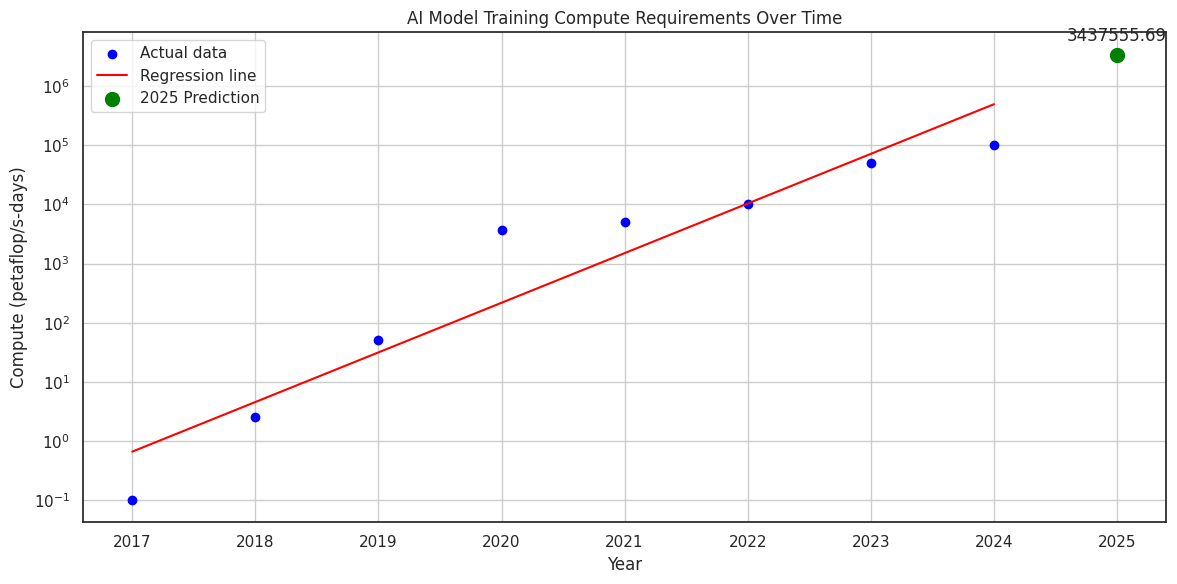

In [ ]:
# Cell 6: Visualize the data and prediction
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Compute'], color='blue', label='Actual data')
plt.plot(df['Year'], np.exp(model.predict(X)), color='red', label='Regression line')

# Add 2025 prediction
plt.scatter(2025, prediction_2025, color='green', s=100, label='2025 Prediction')

plt.title('AI Model Training Compute Requirements Over Time')
plt.xlabel('Year')
plt.ylabel('Compute (petaflop/s-days)')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Annotate the 2025 prediction
plt.annotate(f"{prediction_2025[0]:.2f}",
             (2025, prediction_2025[0]),
             textcoords="offset points",
             xytext=(0,10),
             ha='center')

plt.tight_layout()
plt.show()

We evaluate the model's performance using two common metrics: R-squared and Root Mean Squared Error (RMSE).

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

RMSE measures the average magnitude of the errors between predicted and actual values.

In [ ]:
# Cell 7: Model evaluation
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.9064
Root Mean Squared Error: 1.4235


We calculate the growth rate from the last known compute value in 2024 to the predicted compute value for 2025.

This gives us an idea of the rate at which compute requirements are expected to increase.

In [ ]:
# Cell 8: Calculate and display growth rate
growth_rate = (prediction_2025[0] / df['Compute'].iloc[-1]) - 1
print(f"Predicted growth rate from 2024 to 2025: {growth_rate:.2%}")

Predicted growth rate from 2024 to 2025: 3337.56%


We create a bar chart to visually compare the compute values for 2024 and 2025.

The chart helps to visualize the magnitude of the predicted increase in compute requirements.

Data labels are added to each bar for clarity.

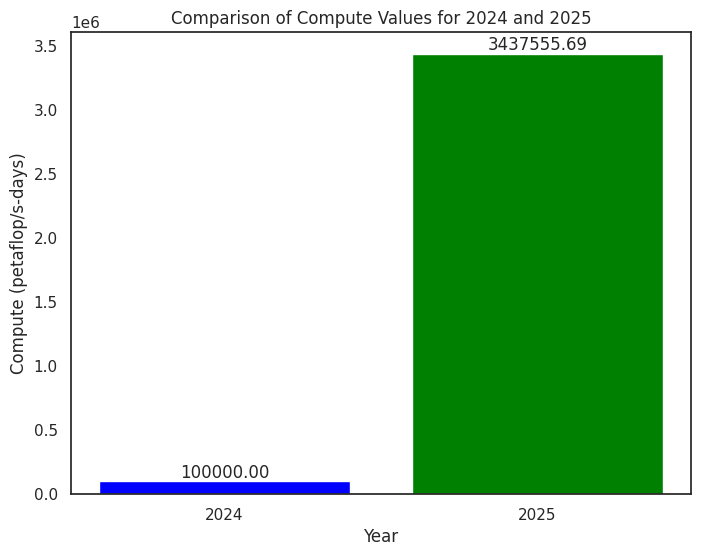

In [ ]:
# Cell 9: Create a bar chart to visualize the difference between 2024 and 2025 compute values.
plt.figure(figsize=(8, 6))
x = ['2024', '2025']
y = [df['Compute'].iloc[-1], prediction_2025[0]]
plt.bar(x, y, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Compute (petaflop/s-days)')
plt.title('Comparison of Compute Values for 2024 and 2025')

# Add data labels
for i, v in enumerate(y):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Show the chart
plt.show()


inspred br this news:
[Microsoft CTO says AI capabilities will continue to grow exponentially for the foreseeable future](https://www.reddit.com/r/OpenAI/comments/1cxqye6/microsoft_cto_says_ai_capabilities_will_continue/)


![image.png](https://i.redd.it/eshd0gghfw1d1.png)